In [1]:
!pip install optbinning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.6/211.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver doe

In [2]:
from optbinning import BinningProcess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(CVXPY) Dec 14 01:01:08 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Dec 14 01:01:08 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
train = pd.read_csv('/content/drive/MyDrive/csv/data_lab5.txt', sep = ',', engine = 'c')

In [ ]:
train.head()

In [5]:
variable_names = list(train.loc[:, ~train.columns.isin(['Клиент', 'Событие'])])
selection_criteria = {
    "iv":
    {
        "min": 0.02,
        "max": 2.5,
        "strategy": "highest",
        "top": 10
    },

    "quality_score":
    {
        "min": 0.01
    }
}
X = train[variable_names]
Y = train["Событие"].values

binning_process = BinningProcess(variable_names, selection_criteria = selection_criteria, max_n_bins = 6)

In [6]:
binning_process.fit(X, Y)

BinningProcess(max_n_bins=6,
               selection_criteria={'iv': {'max': 2.5, 'min': 0.02,
                                          'strategy': 'highest', 'top': 10},
                                   'quality_score': {'min': 0.01}},
               variable_names=['R(Давность)', 'F(Частота)', 'M(Сумма)',
                               'Посещение в выходные',
                               'Дата продажи|Кол-во уникальных',
                               'Дата продажи|Максимум', 'Клиент.1',
                               'Товар|Кол-во уникальных', 'Клиент.2',
                               'Посещение в понедельники',
                               'Дата продажи|Кол-во уникальных.1', 'Клиент.3',
                               'Клиент.4', 'Сумма|Сумма', 'Клиент.5',
                               'Товарная группа|Кол-во уникальных', 'Клиент.6',
                               'Дата продажи|Последний',
                               'Сумма последней продажи'])

In [7]:
binning_process.summary()

name        dtype   status  selected n_bins  \
0                         R(Давность)    numerical  OPTIMAL      True      6   
1                          F(Частота)    numerical  OPTIMAL      True      6   
2                            M(Сумма)    numerical  OPTIMAL      True      6   
3                Посещение в выходные    numerical  OPTIMAL      True      6   
4      Дата продажи|Кол-во уникальных    numerical  OPTIMAL      True      5   
5               Дата продажи|Максимум  categorical  OPTIMAL     False      6   
6                            Клиент.1  categorical  OPTIMAL     False      1   
7             Товар|Кол-во уникальных    numerical  OPTIMAL      True      6   
8                            Клиент.2  categorical  OPTIMAL     False      1   
9            Посещение в понедельники    numerical  OPTIMAL     False      4   
10   Дата продажи|Кол-во уникальных.1    numerical  OPTIMAL     False      3   
11                           Клиент.3  categorical  OPTIMAL     False      1   
12                           Клиент.4  categorical  OPTIMAL     False      1   
13                        Сумма|Сумма    numerical  OPTIMAL      True      6   
14                           Клиент.5  categorical  OPTIMAL     False      1   
15  Товарная группа|Кол-во уникальных    numerical  OPTIMAL      True      6   
16                           Клиент.6  categorical  OPTIMAL     False      1   
17             Дата продажи|Последний  categorical  OPTIMAL     False      6   
18            Сумма последней продажи    numerical  OPTIMAL     False      6   

          iv        js      gini quality_score  
0   1.195691  0.133263  0.559266      0.048541  
1   0.674272  0.079308  0.438266      0.590357  
2   0.465815  0.055717  0.368739      0.880802  
3   0.628824  0.073705  0.410138      0.643566  
4   0.628173  0.073659  0.410252      0.659844  
5   1.645897  0.150149  0.571331      0.001123  
6        0.0       0.0         0           0.0  
7   0.653319  0.076856  0.431051      0.620515  
8        0.0       0.0         0           0.0  
9   0.384599  0.045877  0.311711      0.742125  
10  0.376533  0.045266  0.311368      0.776031  
11       0.0       0.0         0           0.0  
12       0.0       0.0         0           0.0  
13  0.465815  0.055717  0.368739      0.880802  
14       0.0       0.0         0           0.0  
15  0.616426  0.073325  0.424119      0.687664  
16       0.0       0.0         0           0.0  
17  1.645897  0.150149  0.571331      0.001123  
18  0.465815  0.055717  0.368739      0.880802

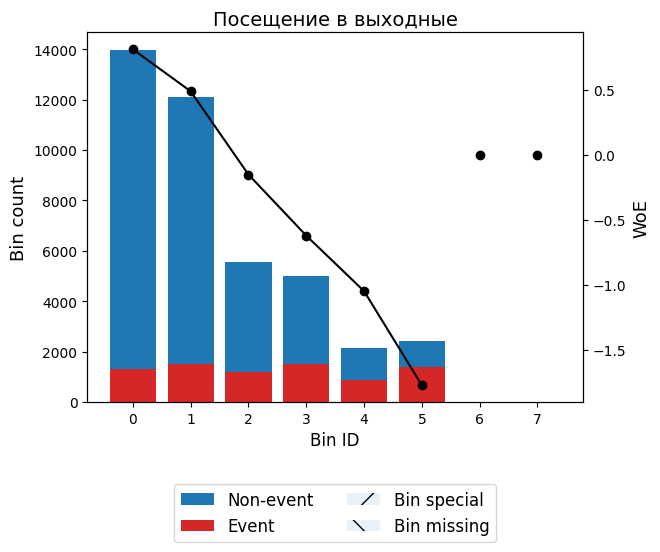

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.41013840
    IV (Jeffrey)             0.62882431
    JS (Jensen-Shannon)      0.07370478
    Hellinger                0.07600948
    Triangular               0.27913333
    KS                       0.33244726
    HHI                      0.24036562
    HHI (normalized)         0.13184642
    Cramer's V               0.33415589
    Quality score            0.64356586

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]  P[B > A]
        0      1    65.540017 5.694586e-16  1.757747e-21       1.0
        1      2   228.064519 1.575602e-51 1.178912e-105       1.0
        2      3   109.404634 1.323198e-25  4.510962e-37       1.0
        3      4    63.237581 1.832192e-15  2.859138e-27       1.0
        4      5   145.787638 1.444664e-33 

In [8]:
# Расчет IV и WoE для "Посещение в выходные"
optb_weekend_visits = binning_process.get_binned_variable("Посещение в выходные")
optb_weekend_visits.binning_table.plot(metric="woe")
optb_weekend_visits.binning_table.analysis()

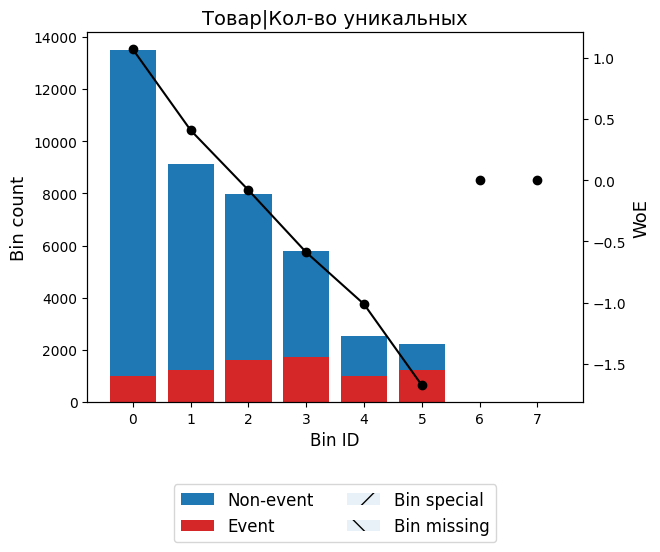

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.43105139
    IV (Jeffrey)             0.65331937
    JS (Jensen-Shannon)      0.07685559
    Hellinger                0.07914444
    Triangular               0.29140700
    KS                       0.32505155
    HHI                      0.22068365
    HHI (normalized)         0.10935274
    Cramer's V               0.32693510
    Quality score            0.62051457

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1   221.556673 4.138460e-50 1.662946e-84       1.0
        1      2   140.705808 1.865832e-32 1.375921e-48       1.0
        2      3   162.175214 3.787999e-37 3.671200e-61       1.0
        3      4    72.652613 1.546021e-17 7.343287e-32       1.0
        4      5   127.629925 1.352506e-29 1.873

In [9]:
# Расчет IV и WoE для "Товар|Кол-во уникальных"
optb_product_diversity = binning_process.get_binned_variable("Товар|Кол-во уникальных")
optb_product_diversity.binning_table.plot(metric="woe")
optb_product_diversity.binning_table.analysis()

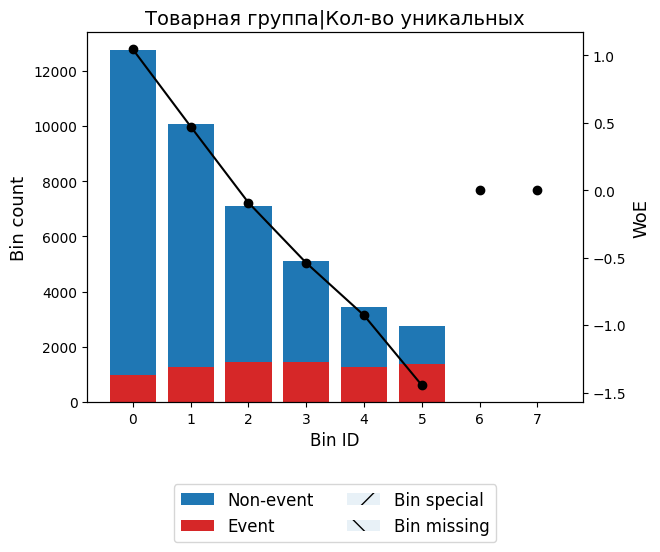

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.42411935
    IV (Jeffrey)             0.61642645
    JS (Jensen-Shannon)      0.07332509
    Hellinger                0.07512038
    Triangular               0.28036869
    KS                       0.32788834
    HHI                      0.21181238
    HHI (normalized)         0.09921415
    Cramer's V               0.31514597
    Quality score            0.68766383

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1   165.523049 7.031567e-38 7.425730e-59       1.0
        1      2   183.108323 1.015731e-41 2.600395e-69       1.0
        2      3   109.720518 1.128279e-25 3.858735e-40       1.0
        3      4    68.837318 1.069300e-16 6.265020e-25       1.0
        4      5   100.265737 1.332623e-23 6.576

In [10]:
# Расчет IV и WoE для "Товарная группа|Кол-во уникальных"
optb_product_groups = binning_process.get_binned_variable("Товарная группа|Кол-во уникальных")
optb_product_groups.binning_table.plot(metric="woe")
optb_product_groups.binning_table.analysis()

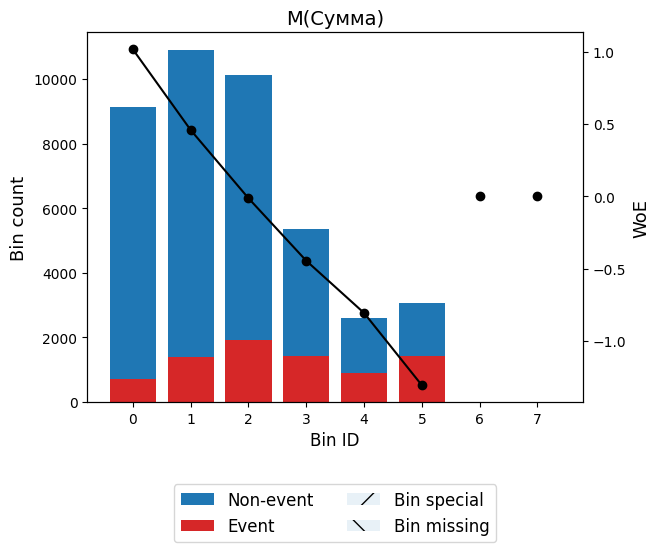

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.36873894
    IV (Jeffrey)             0.46581461
    JS (Jensen-Shannon)      0.05571717
    Hellinger                0.05693117
    Triangular               0.21402252
    KS                       0.26552804
    HHI                      0.20604918
    HHI (normalized)         0.09262763
    Cramer's V               0.27460984
    Quality score            0.88080160

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1   134.900758 3.470912e-31 2.621056e-42       1.0
        1      2   154.111275 2.189833e-35 1.588452e-52       1.0
        2      3   118.424718 1.399669e-27 1.552401e-49       1.0
        3      4    49.409926 2.076921e-12 2.278959e-19       1.0
        4      5    83.426380 6.613357e-20 5.116

In [11]:
# Расчет IV и WoE для "M(Сумма)"
optb_last_visit_spent = binning_process.get_binned_variable("M(Сумма)")
optb_last_visit_spent.binning_table.plot(metric="woe")
optb_last_visit_spent.binning_table.analysis()

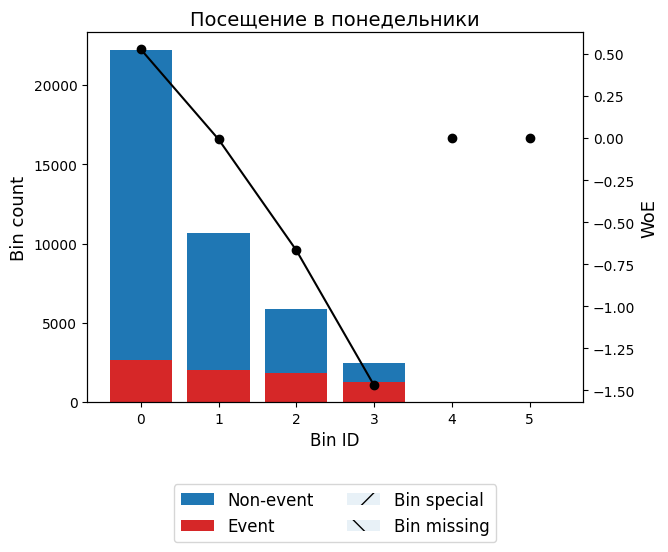

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.31171051
    IV (Jeffrey)             0.38459897
    JS (Jensen-Shannon)      0.04587710
    Hellinger                0.04692776
    Triangular               0.17607942
    KS                       0.23988194
    HHI                      0.38106767
    HHI (normalized)         0.25728120
    Cramer's V               0.26307912
    Quality score            0.74212487

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value      P[A > B]  P[B > A]
        0      1   281.239804 4.031098e-63 1.982423e-132       1.0
        1      2   315.681091 1.263784e-70 7.789963e-142       1.0
        2      3   273.522565 1.937312e-61 7.641123e-149       1.0



In [12]:
# Расчет IV и WoE для "Посещение в понедельники"
optb_product_diversity = binning_process.get_binned_variable("Посещение в понедельники")
optb_product_diversity.binning_table.plot(metric="woe")
optb_product_diversity.binning_table.analysis()

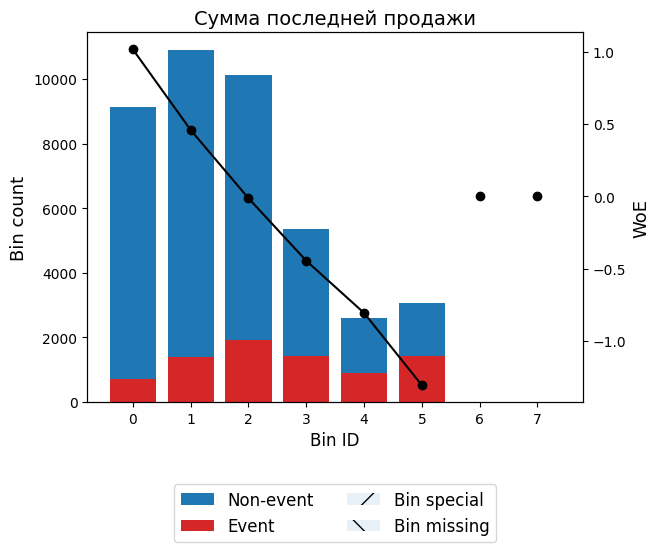

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.36873894
    IV (Jeffrey)             0.46581461
    JS (Jensen-Shannon)      0.05571717
    Hellinger                0.05693117
    Triangular               0.21402252
    KS                       0.26552804
    HHI                      0.20604918
    HHI (normalized)         0.09262763
    Cramer's V               0.27460984
    Quality score            0.88080160

  Monotonic trend             ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1   134.900758 3.470912e-31 2.621056e-42       1.0
        1      2   154.111275 2.189833e-35 1.588452e-52       1.0
        2      3   118.424718 1.399669e-27 1.552401e-49       1.0
        3      4    49.409926 2.076921e-12 2.278959e-19       1.0
        4      5    83.426380 6.613357e-20 5.116

In [13]:
# Расчет IV и WoE для "Сумма последней продажи"
optb_product_diversity = binning_process.get_binned_variable("Сумма последней продажи")
optb_product_diversity.binning_table.plot(metric="woe")
optb_product_diversity.binning_table.analysis()